<a href="https://colab.research.google.com/github/Arman-1994/Experimental-Place/blob/master/Breast_Cancer_ML_vs_ANN_comparisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dataset = load_breast_cancer()

In [0]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
features = dataset.data
features.shape

(569, 30)

In [0]:
target = dataset.target
target.shape

(569,)

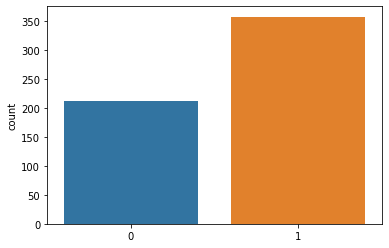

In [0]:
# Looking for the distribution of the class
sns.countplot(target)

In [0]:
x_train, x_test, y_train,y_test = train_test_split(features,target,test_size=.2,stratify=target)

In [0]:
classifier = LogisticRegression()
solvers = ["newton-cg","lbfgs","liblinear","sag","saga"]
penalty = ['none',"l1",'l2',"elasticnet"]
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001 ]

In [0]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=classifier, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,verbose=3)
grid_result = grid_search.fit(x_train, y_train)

Fitting 30 folds for each of 120 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1946 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  1.2min finished


In [0]:
grid_result.best_score_

0.9684981684981685

In [0]:
grid_result.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Considering other models as well
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
models = [] 
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [0]:
results=[]
names = []
kfold = StratifiedKFold(n_splits=5)
for model_name, model in models:
  cv = StratifiedKFold(n_splits=10, random_state=1)
  cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(model_name)
  print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

LR: 0.960440 (0.029157)
LDA: 0.951648 (0.017855)
KNN: 0.931868 (0.030612)
CART: 0.920879 (0.017582)
NB: 0.936264 (0.028146)
SVM: 0.626374 (0.000000)


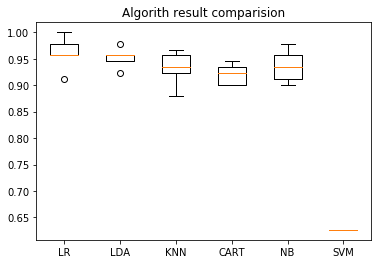

In [0]:
plt.boxplot(results,labels=names)
plt.title("Algorith result comparision")
plt.show()

In [0]:
## Look how ANN out- performs
# Loading Libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.datasets import load_breast_cancer

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [0]:
model = Sequential()
model.add( Dense(1,activation='sigmoid',input_shape=(x_train.shape[1],) ))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
hist = model.fit(x_train,y_train,5,20,validation_data=(x_test,y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/20
455/455 [==============================] - 1s 1ms/sample - loss: 0.5847 - acc: 0.6945 - val_loss: 0.3686 - val_acc: 0.9298
Epoch 2/20
455/455 [==============================] - 0s 501us/sample - loss: 0.3668 - acc: 0.8923 - val_loss: 0.2337 - val_acc: 0.9737
Epoch 3/20
455/455 [==============================] - 0s 458us/sample - loss: 0.2779 - acc: 0.9231 - val_loss: 0.1770 - val_acc: 0.9825
Epoch 4/20
455/455 [==============================] - 0s 478us/sample - loss: 0.2323 - acc: 0.9319 - val_loss: 0.1445 - val_acc: 0.9825
Epoch 5/20
455/455 [==============================] - 0s 426us/sample - loss: 0.2034 - acc: 0.9429 - val_loss: 0.1258 - val_acc: 0.9737
Epoch 6/20
455/455 [==============================] - 0s 446us/sample - loss: 0.1831 - acc: 0.9516 - val_loss: 0.1126 - val_acc: 0.9737
Epoch 7/20
455/455 [==============================] - 0s 454us/sample - loss: 0.1675 - acc: 0.9538 - val_loss: 0.1032 - val_acc: 0.9737
Epoc

Logistic Regression gave best result as 96% 
while a simple ANN resulted in 98%